In [1]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os
import numpy as np
import pathlib
import argparse
from tqdm import tqdm
from glob import glob
from IPython.display import display

In [2]:
with open('./japanese_characters.txt', 'r') as f:
    chars = f.read()
kanji_chars = chars[92:]

img_size = 80
char_size = 70

_img = Image.new("RGB", (img_size, img_size), (255, 255, 255))
white_space_hashes = [hash(_img.tobytes())]

In [3]:
len(kanji_chars)

2136

In [4]:
def draw_single_char(ch, font, canvas_size, x_offset, y_offset):
    img = Image.new("RGB", (canvas_size, canvas_size), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    # draw.text((x_offset, y_offset), ch, (0, 0, 0), font=font)
    draw.text((canvas_size // 2, canvas_size // 2), ch,
              (0, 0, 0), font=font, anchor='mm')
    return img

def draw_example(ch, src_font, canvas_size, x_offset, y_offset):
    src_img = draw_single_char(ch, src_font, canvas_size, x_offset, y_offset)
    dst_hash = hash(src_img.tobytes())
    if dst_hash in white_space_hashes:
        return None
    return src_img

def char_to_hash(ch, font, canvas_size, x_offset, y_offset):
    img = draw_single_char(ch, font, canvas_size, x_offset, y_offset)
    return hash(img.tobytes())

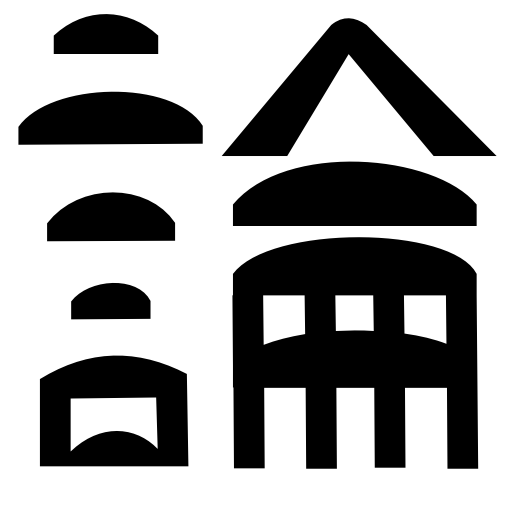

In [5]:
# font_path = '/Users/yuki/Downloads/NewFont-Regular.otf'
font_path = '../my-fonts/shrine.otf'
font = ImageFont.truetype(font_path, 512)
char = '論'
img = draw_example(char, font, 512, 0, 0)
display(img)
img.save(f'../my-fonts/{char}.png')

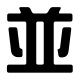

In [6]:
font_path = '/Users/yuki/learn-computer-vision/all-fonts/wt040.ttf'
font = ImageFont.truetype(font_path, char_size)
draw_example('並', font, img_size, 0, 0)




In [5]:
all_font_dir = '../all-fonts'
all_font_root = pathlib.Path(all_font_dir)

In [6]:
all_font_paths =list(all_font_root.glob('*.*tf*'))
all_font_paths = sorted([str(path) for path in all_font_paths])
print(len(all_font_paths))

265


In [7]:
for i, font_path in enumerate(all_font_paths):
    if 'ipaexg.ttf' in font_path:
        print(i)

194


In [11]:
char = '亜'
for font_path in all_font_paths:
#     print(font_path)
    font = ImageFont.truetype(font_path, size=char_size)
    img = draw_example(char,
            font,
            img_size,
            (img_size - char_size) / 2,
            (img_size - char_size) / 2)
    if img is None:
        print(font_path)
#         os.remove(font_path)

../all-fonts/MWindyHK-Bold.otf
../all-fonts/MWindyHKS-Bold.otf
../all-fonts/g_pencilkaisho_free.ttf
../all-fonts/hanwangkantan.ttf
../all-fonts/mellehks.ttf
../all-fonts/mgentle-hks.ttf
../all-fonts/mqinghuahk.otf
../all-fonts/myoungheihk.ttf
../all-fonts/myoungheihks.ttf
../all-fonts/myounghk.otf
../all-fonts/wp010-05.ttf
../all-fonts/wp010-08.ttf
../all-fonts/wt001.ttf
../all-fonts/wt002.ttf
../all-fonts/wt003.ttf
../all-fonts/wt004.ttf
../all-fonts/wt005.ttf
../all-fonts/wt006.ttf
../all-fonts/wt009.ttf
../all-fonts/wt011.ttf
../all-fonts/wt014.ttf
../all-fonts/wt021.ttf
../all-fonts/wt024.ttf
../all-fonts/wt034.ttf
../all-fonts/wt040.ttf
../all-fonts/wt064.ttf
../all-fonts/wt071.ttf
../all-fonts/wtcc02.ttf
../all-fonts/wtcc15.ttf
../all-fonts/wtg-06cut1x.ttf
../all-fonts/wts11.ttf
../all-fonts/wts43.ttf
../all-fonts/wts47.ttf
../all-fonts/wts55.ttf
../all-fonts/しょかきリン片（無料版）.ttf


In [9]:
char = '亜'
tmp_font = ImageFont.truetype(all_font_paths[0], size=char_size)
x_offset = (img_size - char_size) / 2
y_offset = (img_size - char_size) / 2
char_to_hash(char, tmp_font, img_size, x_offset, y_offset)

7851891298537222269

In [12]:
# all hash of all chars of all fonts
all_hashes = []
white_space_hashes = []
for font_path in tqdm(all_font_paths):
    font = ImageFont.truetype(font_path, size=char_size)
    for ch in kanji_chars:
        tmp_hash = char_to_hash(ch, font, img_size, x_offset, y_offset)
        if tmp_hash in all_hashes:
            if tmp_hash not in white_space_hashes:
                white_space_hashes.append(tmp_hash)
        else:
            all_hashes.append(tmp_hash)

100%|██████████| 265/265 [1:31:55<00:00, 20.81s/it]    


In [ ]:
all_font_paths[212]

In [ ]:
glob('../kanji-font-images/id_0/*png')

In [ ]:
for i in range(0, 300):
    files = glob(f'../kanji-font-images/id_{i}/*png')
    print(i, len(files))

In [ ]:
files = glob(f'../kanji-font-images/id_{0}/*png')

In [ ]:
len(files)

In [35]:
glob('../kanji-font-images/id_0/*png')

['../kanji-font-images/id_0/1810.png',
 '../kanji-font-images/id_0/1838.png',
 '../kanji-font-images/id_0/1179.png',
 '../kanji-font-images/id_0/0267.png',
 '../kanji-font-images/id_0/1623.png',
 '../kanji-font-images/id_0/1637.png',
 '../kanji-font-images/id_0/0918.png',
 '../kanji-font-images/id_0/0924.png',
 '../kanji-font-images/id_0/1384.png',
 '../kanji-font-images/id_0/0930.png',
 '../kanji-font-images/id_0/0703.png',
 '../kanji-font-images/id_0/2114.png',
 '../kanji-font-images/id_0/2100.png',
 '../kanji-font-images/id_0/1409.png',
 '../kanji-font-images/id_0/0717.png',
 '../kanji-font-images/id_0/2128.png',
 '../kanji-font-images/id_0/1421.png',
 '../kanji-font-images/id_0/0059.png',
 '../kanji-font-images/id_0/1347.png',
 '../kanji-font-images/id_0/0878.png',
 '../kanji-font-images/id_0/0850.png',
 '../kanji-font-images/id_0/1596.png',
 '../kanji-font-images/id_0/0844.png',
 '../kanji-font-images/id_0/1582.png',
 '../kanji-font-images/id_0/1569.png',
 '../kanji-font-images/id

In [36]:
for i in range(0, 300):
    files = glob(f'../kanji-font-images/id_{i}/*png')
    print(i, len(files))

0 1390
1 2104
2 2135
3 2136
4 1389
5 2136
6 2136
7 2135
8 2134
9 2135
10 2136
11 2134
12 2134
13 0
14 2136
15 2104
16 2136
17 2136
18 2136
19 2132
20 2136
21 2136
22 2136
23 2136
24 2136
25 2136
26 1391
27 2132
28 1391
29 2136
30 2136
31 2136
32 1391
33 2136
34 2136
35 1998
36 1998
37 2136
38 2136
39 1998
40 2136
41 1998
42 1998
43 1998
44 2136
45 1999
46 1998
47 1998
48 1998
49 1998
50 2000
51 1998
52 1998
53 1998
54 1998
55 1998
56 1999
57 2136
58 1998
59 1999
60 2136
61 2136
62 2136
63 2135
64 2136
65 2136
66 1998
67 2132
68 2136
69 2136
70 2136
71 2136
72 2134
73 2104
74 2136
75 2134
76 2132
77 2136
78 2136
79 2136
80 2132
81 2132
82 2104
83 2099
84 2136
85 2107
86 2134
87 2136
88 2136
89 2136
90 2136
91 2136
92 2136
93 2133
94 2136
95 2136
96 2136
97 2136
98 2136
99 2136
100 2136
101 2136
102 2136
103 2136
104 2136
105 2136
106 2135
107 2133
108 2135
109 2136
110 2136
111 2132
112 1862
113 1860
114 1391
115 2136
116 2136
117 2136
118 2136
119 0
120 0
121 2136
122 1392
123 2
124 21

In [37]:
files = glob(f'../kanji-font-images/id_{0}/*png')

In [38]:
len(files)

1390